In [70]:
%matplotlib inline
import nupack, numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# new_sequence = ('GUGCAUGCCAGUCAUUUGCUGUAGCCUCUGCGCUC') # 35 nt random sequence
# new_sequence = ('GGCUCAUGCCCAUGCUCAUG') # 20 nt random sequence
# new_sequence = ('GCGUCGCGUCGCUAUGC') # original sequence
                GUCGCGUCGCGUCGCUAUGCGAC
# From p.16 Othmer's thesis
new_sequence = ('GGAACUGGCUAUGCCUCCUCC')
# p.17
# new_sequence = ('GCGUGAACAUCUGGACAGUAUCUGUCCUCACGCUCACGC')

# p. 89 Wolfe's thesis
# CCTATAGGAGAAACCTATAGGAAGACCTATAGG

len(new_sequence)

21

In [3]:
model = nupack.Model(gt = True)

w = nupack.State(new_sequence, kind='full', model=model) 

In [4]:
print(w.dp())

.....................


In [5]:
# dir(w.structure_energy)
w.energy()

0.0

In [42]:
import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(100 * [w], timeout =1, tau=1e-10, match=0.5, spread = 200) # 10 is number of trajectories * [starting state]
# macros, R_cg, pf_cg, elapsed = nupack.kmc.small_box(100 * [w], tau=1e-04, match=0.4, spread = 75) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())
#     t_avg.append(tend - tstart)
# print(np.mean(np.array(t_avg)))

2.472991943359375
pi [1.55269000e-04 5.40390618e-01 4.59454113e-01]


In [ ]:
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '.......((...)).......', -0.1)]
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1)]
# Partition functions
# [2.526852265, 7.665210704, 6.966625383]
# Balanced rate matrix

#   -3.1090e+04   6.7080e+03   2.4382e+04
#    2.2113e+03  -2.2113e+03            0
#    8.8435e+03            0  -8.8435e+03

# Pi

#    0.1473
#    0.4467
#    0.4060

# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '......((.....))......', -0.3)]
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '......(((...)))......', -3.4)]
#     MfeInterval
#     states: [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1)]
# Partition functions
# [3.063969704, 4726.837348, 14.20241375, 6.775635201]
# Balanced rate matrix

#   -3.5409e+05   2.5284e+05   1.2706e+03   9.9978e+04
#    1.6389e+02  -2.1096e+02   4.7062e+01            0
#    2.7411e+02   1.5663e+04  -1.6533e+04   5.9587e+02
#    4.5210e+04            0   1.2490e+03  -4.6459e+04

# Pi

#    0.0006
#    0.9949
#    0.0030
#    0.0014



In [ ]:
dir(w.pairs)

In [ ]:
# 1:II
# 2:I
# 3:III
# 4:III
# 6:II
# II duplicate

In [43]:
# macro_num = [other, 3, 1, 2]

basis = [] # PP for each macrostate
for m in macros:
    add = np.eye(len(w.pairs.view()))
    add[1:-1, 1:-1] = m.pairs.mean()
    basis.append(add)
basis = np.array(basis)
print(basis.shape)

(3, 23, 23)


In [44]:
enumerated_states, pi, R, distances = w.rate_matrix(basis=basis) # make sure this w has no pairs
# distances should be a M x N array of pair probability distances for N microstates and M given PP matrices
assignments = np.argmin(distances, axis=1) # macrostate assigned to evert microstate (length N)

# "exact" stationary probability of macrostates found by summing individual probabilities of corresponding microstates
exact_pi = np.array([pi[assignments == m].sum() for m in range(len(macros))]) # sum pi values corresponding to one macrostate to compute exact pi

In [45]:
exact_pi

array([0.02734542, 0.52766536, 0.44498922])

In [48]:
len(enumerated_states)

4063

In [55]:
assignments[3500]

2

In [107]:
def differential_eqs(Prob, t, R):
    return Prob @ R

Prob_init = np.zeros(len(enumerated_states))
Prob_init[0] = 1
# tspan = np.logspace(-2, 2,10000, dtype = float)
tspan = np.linspace(0,.001,10000)

Enumerated_Prob = odeint(differential_eqs,t=tspan,y0=Prob_init, args = (R,))

In [108]:
tspan[0]

0.0

In [109]:
Enumerated_Prob.shape

(10000, 4063)

In [110]:
Macros_prob = np.zeros([len(tspan),len(macros)])
for n in range(len(macros)):
    for j in range(len(enumerated_states)):
        if assignments[j]==n:
            Macros_prob[:,n] += Enumerated_Prob[:,j]

In [111]:
Macros_prob[0,0]

1.0

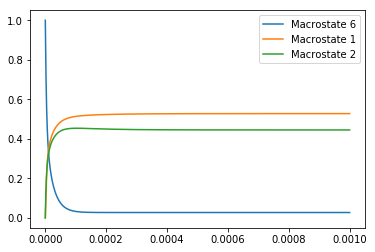

In [112]:
plt.plot(tspan,Macros_prob[:,0],label = 'Macrostate 6')
plt.plot(tspan,Macros_prob[:,1],label = 'Macrostate 1')
plt.plot(tspan,Macros_prob[:,2],label = 'Macrostate 2')
plt.legend()
# plt.xscale('log')

In [59]:
A = np.array([[1],[0],[0]])
B = np.array([[0],[2],[0]])
B += A
print(B)

[[1]
 [2]
 [0]]


In [ ]:
# 2 w/duplicates: 5
# 3 unique: 14
# 4 w/3 duplicates: 1

In [ ]:
[m.mfe.states for m in macros]

In [ ]:
# RANDOM SEQUENCE LENGTH 20
# sequence = ('GGCUCAUGCCCAUGCUCAUG')

# Run 1
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.7, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
# CPU time: 12.350378036499023



# Run 2
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.6, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
# CPU time: 11.894205093383789

# Run 3
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.4, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
# CPU time: 4.3853559494018555

# Run 4
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-08, match=0.6, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
#     MfeInterval
#     states: [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]
# CPU time: 11.598781108856201

#############################################################################

# With "ideal" parameter set

# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.6, spread = 200, log = True)
# CPU time: 12.08612585067749

# 9 more runs: found same sequence (4), found same sequence, two duplicates (3), found same sequence, three duplicates (2)

In [ ]:
# RANDOM SEQUENCE LENGTH 35
# sequence = ('GUGCAUGCCAGUCAUUUGCUGUAGCCUCUGCGCUC')

# Run 1
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.4, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '........(((.(....))))..((....))....', -4.1)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........)))...(((......))).', -3.6)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.((((((.....))))..))...)))))..', -8.9)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '........(((.(....)))).(((......))).', -4.5)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '........(((.(....)))).(((......))).', -4.5)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '........(((.(....))))..((....))....', -4.1)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '........(((.(....))))..((....))....', -4.1)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
# CPU time: 28.63203191757202
# pi [1.24514553e-03 4.42419640e-04 7.82593854e-04 9.92955411e-01
#  1.58488679e-03 2.16142356e-03 1.41436007e-04 2.20374421e-04
#  2.47002446e-05 2.46825706e-04 9.89667492e-05 7.08818856e-06
#  8.87281389e-05]

# Run 2
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.6, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]
# CPU time: 44.17194390296936
# pi [0.998533 0.001467]

# Run 3
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-06, match=0.7, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(...((.((.....)).)).).)))))..', -5.2)]
# CPU time: 23.16708493232727

# Run 4
# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-04, match=0.6, spread = 200, log = True)
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
# Partition functions
# [5735720.623, 27687.85965]
# Balanced rate matrix
#   -2.0171e+00   2.0171e+00
#    4.1785e+02  -4.1785e+02
# Pi
#    0.9952
#    0.0048
# CPU time: 228.481371879577637

#############################################################################

# With "ideal" parameter set

# nupack.kmc.small_box(10 * [w], timeout = .01, tau=10e-04, match=0.6, spread = 200, log = True)
# CPU time: 19.10795497894287
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# CPU time: 18.926079034805298
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# CPU time: 18.897757291793823
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# additional 6 runs: 
#twice found same sequence (2 duplicates), twice found same sequence,

# twice
# Final macrostate MFEs:
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]
#     MfeInterval
#     states: [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((...........))).((((...))))....', -4)]
# Partition functions
# [5990867.737, 21650.33793]
# Balanced rate matrix
#   -1.4803e+00   1.4803e+00
#    4.0963e+02  -4.0963e+02
# Pi
#    0.9964
#    0.0036

In [ ]:
# macros[0].energy()
macro_mfes = [m.mfe.states[0] for m in macros]
print([mfe.energy() for mfe in macro_mfes])

In [ ]:
CPU_time_per_traj = [e[0]/200 for e in elapsed]
print('CPU_time_per_traj',CPU_time_per_traj)
Traj_time = [e[1]/200 for e in elapsed]
print('Traj_time',Traj_time)
Traj_step = [e[2]/200 for e in elapsed]
print('Traj_step',Traj_step)

In [ ]:
Traj_time = np.array(Traj_time)
Traj_time_distribution = [Traj_time[m] / Traj_time.sum() for m in range(len(Traj_time))]
print('Traj_time_distribution',Traj_time_distribution)
macros_energy = np.array([0, -5.1, -5.2])
Energy_distribution = [macros_energy[m] / macros_energy.sum() for m in range(len(macros_energy))]
print('Energy_distribution',Energy_distribution)
print(np.array(Energy_distribution) / np.array(Traj_time_distribution))
print(macros_energy / np.array(Traj_time_distribution))
# macros[0].energy()

In [ ]:
R = np.array([[-1.4803, 1.4803],[409.63, -409.63]])

In [ ]:
def differential_eqs(Prob, t, R):
    return Prob @ R

tspan = np.linspace(0, 0.005,10000, dtype = float)

Coarse_Grain_Prob = odeint(differential_eqs,t=tspan,y0=np.array([0,0,1], dtype = float), args = (R_cg,)) 
np.shape(Coarse_Grain_Prob)

In [ ]:
Coarse_Grain_Prob[0:20,0]

In [ ]:
# plt.plot(tspan[0:100000],Coarse_Grain_Prob[0:100000,2], label = 'Macrostate 1')
# plt.plot(tspan[0:100000],Coarse_Grain_Prob[0:100000,1], label = 'Macrostate 2')
# plt.plot(tspan[0:100000],Coarse_Grain_Prob[0:100000,0], label = 'Macrostate 6')
plt.plot(tspan,Coarse_Grain_Prob[:,2], label = 'Macrostate A')
plt.plot(tspan,Coarse_Grain_Prob[:,0], label = 'Macrostate B', color='#2ca02c')
plt.plot(tspan,Coarse_Grain_Prob[:,1], label = 'Macrostate C', color='#ff7f0e')


# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('time(s)')
plt.ylabel('probability')
plt.title('Course-Grained with "Log-Scan"')
# plt.axis([0, 1, 0, 1])
# plt.xlim([1e-03, 2e-03])
plt.legend()

In [ ]:
basis = [] # PP for each macrostate
for m in macros:
    add = np.eye(len(w.pairs.view()))
    add[1:-1, 1:-1] = m.pairs.mean()
    basis.append(add)
basis = np.array(basis)
print(basis.shape)

In [ ]:
enumerated_states, pi, R, distances = w.rate_matrix

In [ ]:
# help(macros[0].mfe.states.index)
macros[0].energy
# macros[0].mfe
# macros[0].pairs.mean()

In [ ]:
for m in macros:
    print(m.time.end_time - m.time.begin_time)

In [ ]:
10**(np.abs(round(float(w.energy()),3)) - 9)

In [ ]:
# Rough test of algorithm idea for reducing number of required parameters
# First test: set P_min = 0.01, no stringency
# Stick with 1 initial trajectory for now
P_min = 0.1

alpha = -9
print(alpha)

tau_min = 10**(alpha + np.abs(round(float(w.energy()),3)))
print(tau_min)

spread =  int(round(-67 * np.log(P_min) + 18))
print(spread)

match = round(-0.05 * np.log(P_min) + 0.35,2)
print(match)

In [ ]:
# First Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.................', 0)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.................', 0)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.................', 0)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.....((...)).....', -0.8)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.................', 0)]
# Many duplicates. P_min not satisfied. 

In [ ]:
pi_run = pf_cg/pf_cg.sum()
pi_min = pi_run[np.argmin(pi_run)]
print(pi_min - P_min)

# if pi_min is below P_min, the number of trajectories should decrease

In [ ]:
# Just manually adjust spread for now to figure out how much it should be adjusted to satisfy P_min
# spread = 100
tau_min = 1e-07

In [ ]:
# Second Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
# Many duplicates, barely found most stable macrostate, did not satisfy P_min
# 

In [ ]:
# match = 0.55
tau_min = 1e-06

In [ ]:
# Third Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.................', 0)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
# 4 unique states with 2 duplicates
# 

In [ ]:
# spread = 125
# match = 0.6
tau_min = 1e-05

In [ ]:
# Fourth Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
# All duplicates except one, only found most stable macrostates
# 

In [ ]:
# pi_run = pf_cg/pf_cg.sum()
# pi_min = pi_run[np.argmin(pi_run)]
# print(pi_min - P_min)

# spread = spread + int(round(50* 10**(pi_min - P_min)))
# print(spread)

# match = match + round(np.abs(-0.085107987366156),2)
# print(match)

# spread = 200
# match = 0.65
tau_min = 1e-04

In [ ]:
# Fifth Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
# Good that they're unique, P_min not satisfied
# As tau_min gets larger, it starts to only find macrostates that have the lowest MFE

In [ ]:
# spread = 250
# match = 0.7
tau_min = 1e-03

In [ ]:
# Fifth Trial

import time
t_avg = []
# for n in range(5):
tstart = time.time()
macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
tend = time.time()
print(tend - tstart)
print('pi', pf_cg/pf_cg.sum())

# RESULT: 
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
#     MfeInterval
#     states: [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
# only 1 MFE structure, not unique macrostate, P_min not satisfied
# Large tau_min only discovers most stable macrostate

In [ ]:
# spread = 200
# match = 0.85
# tau_min = 1e-03

In [ ]:
# # Sixth Trial--This tau took too long

# import time
# t_avg = []
# # for n in range(5):
# tstart = time.time()
# macros, R_cg, pf_cg = nupack.kmc.small_box(1 * [w], timeout = 1000, tau=tau_min, match=match, spread = spread, log = True) # 10 is number of trajectories * [starting state]
# tend = time.time()
# print(tend - tstart)
# print('pi', pf_cg/pf_cg.sum())

# # RESULT: 
# # 
# # Good because it satisfies P_min, but it missed the most stable macrostate. 